Практикум 1. Задание.
Используя  библиотеки, pandas, requests, pyod:
- cкачать json с 2000 вакансий по специальности Разработчик применяя api.hh.ru, без ограничения региона, с указанием зп 
(параметр запроса only_with_salary=True)
- На основе полученного json создать таблицу Pandas DataFrame  df из полей - id, name, area.name, salary.from, salary,to, salary.gross, salary.currency, snippet.requirements, experience.name 
- создать новое поле clean_sal, усредняющее предлагаемую в вакансии зп, на основе известных сумм "от" и "до".
- с использованием boxplot определить наличие аномальных значений в полученном столбце
- с использованием библиотеки pyod, выбрать 3 метода без учителя, определения аномалий, и на основе их результатов, добавить в датафрейм df поля - anomaly1, anomaly2, anomaly3. 
- с использованием голосования большинством получить столбец anomaly, по 3-м полям выше
- для каждой из аномалий, ориентируясь на название вакансии, требуемый опыт, регион, требования к вакансии, получить объяснение и в виде категории с кратким текстом, описывающим ее суть, добавить эти объяснения отдельным столбцов в датафрейм
- Результирующий датафрейм в виде xls файла,  текстовый файл с ссылкой на колаб с результатами добавить в архив со своими фио и загрузить в результаты ПР1. Результаты

In [1]:
import requests
import pandas as pd
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF

In [2]:
URL='https://api.hh.ru/vacancies?'
df_lst = []
for i in range(20):
    header = { 
    'text':'разработчик',
    'page':i,
    'per_page':100,
    'search_field':'name',
    'only_with_salary': 'True'
    }
    tmp = pd.json_normalize(requests.get(URL,params=header).json()['items'])
    df_lst.append(tmp)
df_api = pd.concat(df_lst)
df = df_api[['id',
    'name',
    'area.name',
    'salary.from',
    'salary.to',
    'salary.gross',
    'salary.currency',
    'snippet.requirement',
    'experience.name' ]]
del df_api
df.reset_index(inplace=True)
df.drop('index', inplace=True, axis=1)
df

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,True,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет
1,124976421,Frontend-разработчик-React,Ташкент,10000000.0,12000000.0,False,UZS,Опыт разработки с использованием React не мене...,От 1 года до 3 лет
2,125269826,React Developer,Ташкент,5000000.0,8000000.0,True,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет
3,125165161,Front-end и UX developer,Ташкент,8000000.0,13000000.0,True,UZS,Опыт работы front-end <highlighttext>developer...,От 3 до 6 лет
4,125256275,Senior Frontend Developer,Ташкент,2000.0,2000.0,False,USD,Ищем Frontend-<highlighttext>разработчика</hig...,Более 6 лет
...,...,...,...,...,...,...,...,...,...
1995,124718135,Разработчик веб-игры,Новосибирск,90000.0,150000.0,True,RUR,Опыт разработки игр под web (HTML5 / JavaScrip...,От 1 года до 3 лет
1996,124826070,Программист 1С,Санкт-Петербург,170000.0,NaN,False,RUR,Опыт разработки в среде 1С 8.3 от 5-х лет. Про...,От 1 года до 3 лет
1997,125110004,Инженер-программист,Дзержинск (Нижегородская область),68000.0,75000.0,True,RUR,Опыт работы в 1С. Знание бухгалтерского учета.,От 1 года до 3 лет
1998,123212024,Разработчик на Wordpress / Frontend developer,Екатеринбург,NaN,100000.0,False,RUR,Знание и соблюдение БЭМ методологии при верстк...,От 1 года до 3 лет


In [3]:
# !wget https://www.cbr.ru/currency_base/daily/

In [4]:
cur = pd.read_html('data/index.html')[0]
print(cur.columns)
cd = dict(zip(cur['Букв. код'], cur['Курс']/cur['Единиц']/10000))
cd.update({'RUR': 1})
cd.pop('BYN')
cd.update({'BYR': 27.38})
cd

Index(['Цифр. код', 'Букв. код', 'Единиц', 'Валюта', 'Курс'], dtype='object')


{'AUD': 56.1801,
 'AZN': 49.6352,
 'DZD': 0.650804,
 'AMD': 0.220043,
 'THB': 2.6625,
 'BHD': 224.3659,
 'BGN': 50.4121,
 'BOB': 12.2113,
 'BRL': 15.668,
 'KRW': 0.0607311,
 'HKD': 10.8611,
 'UAH': 2.0439,
 'DKK': 13.2327,
 'AED': 22.9761,
 'USD': 84.3798,
 'VND': 0.00334628,
 'EUR': 99.3304,
 'EGP': 1.7505700000000002,
 'PLN': 23.2131,
 'JPY': 0.572804,
 'INR': 0.9558139999999999,
 'IRR': 0.00014540699999999999,
 'CAD': 60.9504,
 'QAR': 23.1813,
 'CUP': 3.5158300000000002,
 'MMK': 0.040180900000000006,
 'GEL': 31.3225,
 'MDL': 5.0588,
 'NGN': 0.056173400000000005,
 'NZD': 50.379,
 'TMT': 24.1085,
 'NOK': 8.49105,
 'OMR': 219.4533,
 'RON': 19.5062,
 'IDR': 0.00512386,
 'ZAR': 4.84866,
 'SAR': 22.5013,
 'XDR': 115.5514,
 'RSD': 0.8444959999999999,
 'SGD': 65.7932,
 'KGS': 0.964892,
 'TJS': 8.869010000000001,
 'BDT': 0.693095,
 'KZT': 0.156581,
 'MNT': 0.023472800000000002,
 'TRY': 2.04565,
 'UZS': 0.00677894,
 'HUF': 0.252483,
 'GBP': 114.3937,
 'CZK': 4.06669,
 'SEK': 9.00313,
 'CHF': 

In [5]:
df['clean_sal'] = df['salary.currency'].map(cd) * df['salary.gross'].map({False:1, True:0.87})
df.loc[:, 'clean_sal'] = df[['salary.from', 'salary.to']].mean(axis=1).values * df['clean_sal']
df

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,True,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет,44273.27775
1,124976421,Frontend-разработчик-React,Ташкент,10000000.0,12000000.0,False,UZS,Опыт разработки с использованием React не мене...,От 1 года до 3 лет,74568.34000
2,125269826,React Developer,Ташкент,5000000.0,8000000.0,True,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет,38334.90570
3,125165161,Front-end и UX developer,Ташкент,8000000.0,13000000.0,True,UZS,Опыт работы front-end <highlighttext>developer...,От 3 до 6 лет,61925.61690
4,125256275,Senior Frontend Developer,Ташкент,2000.0,2000.0,False,USD,Ищем Frontend-<highlighttext>разработчика</hig...,Более 6 лет,168759.60000
...,...,...,...,...,...,...,...,...,...,...
1995,124718135,Разработчик веб-игры,Новосибирск,90000.0,150000.0,True,RUR,Опыт разработки игр под web (HTML5 / JavaScrip...,От 1 года до 3 лет,104400.00000
1996,124826070,Программист 1С,Санкт-Петербург,170000.0,NaN,False,RUR,Опыт разработки в среде 1С 8.3 от 5-х лет. Про...,От 1 года до 3 лет,170000.00000
1997,125110004,Инженер-программист,Дзержинск (Нижегородская область),68000.0,75000.0,True,RUR,Опыт работы в 1С. Знание бухгалтерского учета.,От 1 года до 3 лет,62205.00000
1998,123212024,Разработчик на Wordpress / Frontend developer,Екатеринбург,NaN,100000.0,False,RUR,Знание и соблюдение БЭМ методологии при верстк...,От 1 года до 3 лет,100000.00000


<Axes: >

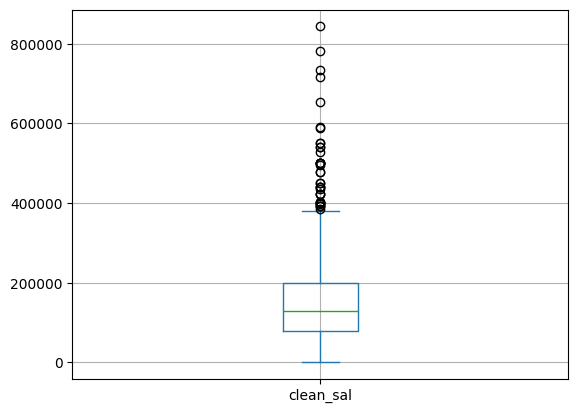

In [6]:
df['clean_sal'].plot(kind='box', grid=True)

In [7]:
contamination = 0.03
models = [KNN(n_neighbors=20, method='largest', contamination=contamination), IForest(n_estimators=100, contamination=contamination), LOF(n_neighbors=20, contamination=contamination)]
cols_anomaly = []
for i, model in enumerate(models):
    model.fit(df[['clean_sal']])
    col_name = f'anomaly_{i+1}'
    cols_anomaly.append(col_name)
    df[col_name] = model.labels_
df

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly_1,anomaly_2,anomaly_3
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,True,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет,44273.27775,0,0,0
1,124976421,Frontend-разработчик-React,Ташкент,10000000.0,12000000.0,False,UZS,Опыт разработки с использованием React не мене...,От 1 года до 3 лет,74568.34000,0,0,0
2,125269826,React Developer,Ташкент,5000000.0,8000000.0,True,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет,38334.90570,0,0,0
3,125165161,Front-end и UX developer,Ташкент,8000000.0,13000000.0,True,UZS,Опыт работы front-end <highlighttext>developer...,От 3 до 6 лет,61925.61690,0,0,0
4,125256275,Senior Frontend Developer,Ташкент,2000.0,2000.0,False,USD,Ищем Frontend-<highlighttext>разработчика</hig...,Более 6 лет,168759.60000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,124718135,Разработчик веб-игры,Новосибирск,90000.0,150000.0,True,RUR,Опыт разработки игр под web (HTML5 / JavaScrip...,От 1 года до 3 лет,104400.00000,0,0,0
1996,124826070,Программист 1С,Санкт-Петербург,170000.0,NaN,False,RUR,Опыт разработки в среде 1С 8.3 от 5-х лет. Про...,От 1 года до 3 лет,170000.00000,0,0,0
1997,125110004,Инженер-программист,Дзержинск (Нижегородская область),68000.0,75000.0,True,RUR,Опыт работы в 1С. Знание бухгалтерского учета.,От 1 года до 3 лет,62205.00000,0,0,0
1998,123212024,Разработчик на Wordpress / Frontend developer,Екатеринбург,NaN,100000.0,False,RUR,Знание и соблюдение БЭМ методологии при верстк...,От 1 года до 3 лет,100000.00000,0,0,0


In [8]:
cols_anomaly

['anomaly_1', 'anomaly_2', 'anomaly_3']

In [9]:
df['anomaly'] = df[cols_anomaly].mean(axis=1).round().astype(int)
df.loc[df['anomaly'] == 1]

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly_1,anomaly_2,anomaly_3,anomaly
25,125094808,"Исполнительный Директор,Executive Director/ Bu...",Москва,400000.0,500000.0,False,RUR,"Опыт работы в роли исполнительного, операционн...",Более 6 лет,450000.000,1,1,0,1
72,125110410,Senior Frontend Developer,Москва,350000.0,420000.0,False,RUR,Опыт коммерческой разработки в команде от 2 ле...,Более 6 лет,385000.000,1,1,1,1
100,125188508,Программист 1С,Владивосток,4000.0,6000.0,True,USD,"опытного, который понимает принципы бухгалтери...",От 3 до 6 лет,367052.130,1,0,1,1
136,125154982,Senior Python-разработчик,Москва,500000.0,NaN,False,RUR,Опыт на аналогичной позиции не менее 5 лет. Оп...,От 3 до 6 лет,500000.000,1,1,0,1
148,125159023,Senior Front-end Developer (Кипр),Кипр,5500.0,7000.0,True,EUR,"Уверенное владение TypeScript, JavaScript, CSS...",Более 6 лет,540109.050,1,1,0,1
161,124847087,Senior Frontend Developer / Старший фронтэнд р...,Москва,5000.0,10000.0,True,USD,5+ years of React and Typescript experience. E...,От 3 до 6 лет,550578.195,1,1,0,1
339,123762841,Backend-разработчик,Москва,350000.0,450000.0,False,RUR,"Уверенные знания PHP 7-8, Laravel. Иметь опыт ...",От 3 до 6 лет,400000.000,1,1,0,1
344,124924238,Frontend-разработчик(Junior+),Новосибирск,700.0,NaN,False,RUR,"JavaScript, TypeScript /Уверенное знание и опы...",От 1 года до 3 лет,700.000,1,1,0,1
354,125165631,Старший С++ Разработчик,Москва,5500.0,7000.0,True,EUR,Высшее образование в области Computer Science ...,Более 6 лет,540109.050,1,1,0,1
395,125109973,Senior Developer (Blockchain),Москва,500000.0,NaN,False,RUR,Cтэк: solidity / rust / python / Go / typescri...,От 3 до 6 лет,500000.000,1,1,0,1


In [10]:
df['причина_аномалии'] = ''

In [ ]:
df.loc[(df['experience.name'] == 'Более 6 лет') & (df['anomaly'] == 1), 'причина_аномалии'] = 'Большой опыт'
df

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly_1,anomaly_2,anomaly_3,anomaly,причина_аномалии
0,125271742,Strong Junior| Middle Frontend разработчик | В...,Шымкент,250000.0,400000.0,True,KZT,Опыт работы frontend-<highlighttext>разработчи...,От 1 года до 3 лет,44273.27775,0,0,0,0,
1,124976421,Frontend-разработчик-React,Ташкент,10000000.0,12000000.0,False,UZS,Опыт разработки с использованием React не мене...,От 1 года до 3 лет,74568.34000,0,0,0,0,
2,125269826,React Developer,Ташкент,5000000.0,8000000.0,True,UZS,Опыт коммерческой разработки на JavaScript/Typ...,От 1 года до 3 лет,38334.90570,0,0,0,0,
3,125165161,Front-end и UX developer,Ташкент,8000000.0,13000000.0,True,UZS,Опыт работы front-end <highlighttext>developer...,От 3 до 6 лет,61925.61690,0,0,0,0,
4,125256275,Senior Frontend Developer,Ташкент,2000.0,2000.0,False,USD,Ищем Frontend-<highlighttext>разработчика</hig...,Более 6 лет,168759.60000,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,124718135,Разработчик веб-игры,Новосибирск,90000.0,150000.0,True,RUR,Опыт разработки игр под web (HTML5 / JavaScrip...,От 1 года до 3 лет,104400.00000,0,0,0,0,
1996,124826070,Программист 1С,Санкт-Петербург,170000.0,NaN,False,RUR,Опыт разработки в среде 1С 8.3 от 5-х лет. Про...,От 1 года до 3 лет,170000.00000,0,0,0,0,
1997,125110004,Инженер-программист,Дзержинск (Нижегородская область),68000.0,75000.0,True,RUR,Опыт работы в 1С. Знание бухгалтерского учета.,От 1 года до 3 лет,62205.00000,0,0,0,0,
1998,123212024,Разработчик на Wordpress / Frontend developer,Екатеринбург,NaN,100000.0,False,RUR,Знание и соблюдение БЭМ методологии при верстк...,От 1 года до 3 лет,100000.00000,0,0,0,0,


In [14]:
df.loc[(df['experience.name'] == 'Более 6 лет') & (df['anomaly'] == 1)]

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly_1,anomaly_2,anomaly_3,anomaly,причина_аномалии
25,125094808,"Исполнительный Директор,Executive Director/ Bu...",Москва,400000.0,500000.0,False,RUR,"Опыт работы в роли исполнительного, операционн...",Более 6 лет,450000.000,1,1,0,1,Большой опыт
72,125110410,Senior Frontend Developer,Москва,350000.0,420000.0,False,RUR,Опыт коммерческой разработки в команде от 2 ле...,Более 6 лет,385000.000,1,1,1,1,Большой опыт
148,125159023,Senior Front-end Developer (Кипр),Кипр,5500.0,7000.0,True,EUR,"Уверенное владение TypeScript, JavaScript, CSS...",Более 6 лет,540109.050,1,1,0,1,Большой опыт
354,125165631,Старший С++ Разработчик,Москва,5500.0,7000.0,True,EUR,Высшее образование в области Computer Science ...,Более 6 лет,540109.050,1,1,0,1,Большой опыт
530,124852013,Senior Web разработчик,Санкт-Петербург,320000.0,420000.0,False,RUR,"Глубокие знания TypeScript, Vue.js и их особен...",Более 6 лет,370000.000,1,0,1,1,Большой опыт
562,124847084,Senior Backend Engineer / Старший бэкэнд разра...,Москва,5000.0,12000.0,False,USD,7+ years of backend or data engineering experi...,Более 6 лет,717228.300,1,1,0,1,Большой опыт
611,124153358,Java-разработчик,Москва,NaN,500000.0,False,RUR,Коммерческий опыт работы Java-<highlighttext>р...,Более 6 лет,500000.000,1,1,0,1,Большой опыт
666,125016419,Senior PHP/Go developer,Москва,300000.0,450000.0,False,RUR,Опыт в разработке от 6 лет. Опыт работы с Symf...,Более 6 лет,375000.000,1,1,1,1,Большой опыт
732,124727976,Business Development Manager (Oil Refinery and...,Москва,6000.0,NaN,True,USD,Высшее образование. Опыт работы по продвижению...,Более 6 лет,440462.556,1,1,0,1,Большой опыт
778,124812303,Python-разработчик,Москва,5000.0,8000.0,True,USD,"Отличное знание Python, опыт работы с микросер...",Более 6 лет,477167.769,1,1,0,1,Большой опыт


In [16]:
df.loc[(df['anomaly'] == 1) & (df['clean_sal'] < 5000), 'причина_аномалии'] = 'зарплата указана не за месяц'
df.loc[(df['anomaly'] == 1)]

,id,name,area.name,salary.from,salary.to,salary.gross,salary.currency,snippet.requirement,experience.name,clean_sal,anomaly_1,anomaly_2,anomaly_3,anomaly,причина_аномалии
25,125094808,"Исполнительный Директор,Executive Director/ Bu...",Москва,400000.0,500000.0,False,RUR,"Опыт работы в роли исполнительного, операционн...",Более 6 лет,450000.000,1,1,0,1,Большой опыт
72,125110410,Senior Frontend Developer,Москва,350000.0,420000.0,False,RUR,Опыт коммерческой разработки в команде от 2 ле...,Более 6 лет,385000.000,1,1,1,1,Большой опыт
100,125188508,Программист 1С,Владивосток,4000.0,6000.0,True,USD,"опытного, который понимает принципы бухгалтери...",От 3 до 6 лет,367052.130,1,0,1,1,
136,125154982,Senior Python-разработчик,Москва,500000.0,NaN,False,RUR,Опыт на аналогичной позиции не менее 5 лет. Оп...,От 3 до 6 лет,500000.000,1,1,0,1,
148,125159023,Senior Front-end Developer (Кипр),Кипр,5500.0,7000.0,True,EUR,"Уверенное владение TypeScript, JavaScript, CSS...",Более 6 лет,540109.050,1,1,0,1,Большой опыт
161,124847087,Senior Frontend Developer / Старший фронтэнд р...,Москва,5000.0,10000.0,True,USD,5+ years of React and Typescript experience. E...,От 3 до 6 лет,550578.195,1,1,0,1,
339,123762841,Backend-разработчик,Москва,350000.0,450000.0,False,RUR,"Уверенные знания PHP 7-8, Laravel. Иметь опыт ...",От 3 до 6 лет,400000.000,1,1,0,1,
344,124924238,Frontend-разработчик(Junior+),Новосибирск,700.0,NaN,False,RUR,"JavaScript, TypeScript /Уверенное знание и опы...",От 1 года до 3 лет,700.000,1,1,0,1,зарплата указана не за месяц
354,125165631,Старший С++ Разработчик,Москва,5500.0,7000.0,True,EUR,Высшее образование в области Computer Science ...,Более 6 лет,540109.050,1,1,0,1,Большой опыт
395,125109973,Senior Developer (Blockchain),Москва,500000.0,NaN,False,RUR,Cтэк: solidity / rust / python / Go / typescri...,От 3 до 6 лет,500000.000,1,1,0,1,


In [18]:
df.loc[(df['anomaly'] == 1) & (df['experience.name'] == 'От 3 до 6 лет'), 'причина_аномалии'] = 'Скорее всего большой опыт, так как на hh такая категория опыта предпоследняя'

In [21]:
df.loc[(df['anomaly'] == 1) & (df['причина_аномалии'] == ''), 'причина_аномалии'] = 'Судя по описанию тоже требуется большой опыт'

In [25]:
df.to_excel('res_Умаров_lab.xlsx')